## **Análisis y Predicción de Ventas en una Tienda de Retail (Core)**

### **Parte III: Transformación y Análisis Avanzado de Datos con Pandas**

En esta tercera parte del proyecto, continuaremos trabajando con el dataset de ventas que utilizamos en la Parte II. En esta fase, aplicaremos técnicas avanzadas de transformación y análisis de datos utilizando las nuevas habilidades adquiridas en Pandas, tales como agrupaciones complejas y el uso del método apply. Nos enfocaremos en extraer insights más profundos y preparar los datos para futuros análisis y modelos predictivos.

### **Instrucciones**

#### **Procesamiento Inicial de los datos**

In [2]:
import pandas as pd
import numpy as np

path = ('../data/retail_sales_dataset.csv')
df = pd.read_csv(path)

# Informacion del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [3]:
# Identificar valores nulos
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
Transaction ID,1000,0,0.0
Date,1000,0,0.0
Customer ID,1000,0,0.0
Gender,1000,0,0.0
Age,1000,0,0.0
Product Category,1000,0,0.0
Quantity,1000,0,0.0
Price per Unit,1000,0,0.0
Total Amount,1000,0,0.0


In [4]:
# Tipos de datos
df.dtypes

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

In [5]:
# Añadimos una nueva coluna de clasificacion
def clasificar_ventas(amount):
    if amount > 150:
        return 'Alta'
    elif amount > 50:
        return 'Media'
    else:
        return 'Baja'

df['Clasificación'] = df['Total Amount'].apply(clasificar_ventas)

In [24]:
# Convertir los tipos de datos
df['Date'] = pd.to_datetime(df['Date'])  
df['Customer ID'] = df['Customer ID'].astype('string') 
df['Gender'] = df['Gender'].astype('category')  
df['Product Category'] = df['Product Category'].astype('category')
df['Clasificación'] = df['Clasificación'].astype('category')
  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Transaction ID              1000 non-null   int64         
 1   Date                        1000 non-null   datetime64[ns]
 2   Customer ID                 1000 non-null   string        
 3   Gender                      1000 non-null   category      
 4   Age                         1000 non-null   int64         
 5   Product Category            1000 non-null   category      
 6   Quantity                    1000 non-null   int64         
 7   Price per Unit              1000 non-null   int64         
 8   Total Amount                1000 non-null   int64         
 9   Clasificación               1000 non-null   category      
 10  Age Group                   1000 non-null   category      
 11  Price per Unit_normalizado  1000 non-null   float64      

In [25]:
# Identificar duplicados
duplicados = df.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")

Número de registros duplicados: 0


### **1. Transformación de Datos**

* Crea nuevas columnas: Basándonos en los datos existentes, crea nuevas columnas que sean útiles para el análisis. Por ejemplo, calcula el ingreso total por venta y normaliza las ventas.
* Clasifica los datos: Crea una columna que clasifique las ventas en categorías significativas (e.g., ‘Alta’, ‘Media’, ‘Baja’).


In [8]:
# Añadimos una nueva coluna Age Group
df['Age Group'] = pd.cut(df['Age'], bins=[0, 18, 25, 35, 50, 65, 100], 
                         labels=["<18", "18-25", "26-35", "36-50", "51-65", "65+"])

In [9]:
# Normalizar la columna 'Price per Unit' and 'Total Amount'
max_Price_per_Uni = df['Price per Unit'].max()
min_Price_per_Uni = df['Price per Unit'].min()
df['Price per Unit_normalizado'] = df['Price per Unit'].apply(lambda x: (x - min_Price_per_Uni) / (max_Price_per_Uni - min_Price_per_Uni))

max_total = df['Price per Unit'].max()
min_total = df['Price per Unit'].min()
df['Total Amount_normalizado'] = df['Price per Unit'].apply(lambda x: (x - min_total) / (max_total - min_total))

In [10]:
# Clasificar los productos por rango de ventas
df['Clasificación'] = df['Total Amount'].apply(lambda x: 'Alta' if x > 150 else 'Baja')

In [11]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Clasificación,Age Group,Price per Unit_normalizado,Total Amount_normalizado
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Baja,26-35,0.052632,0.052632
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Alta,26-35,1.000000,1.000000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Baja,36-50,0.010526,0.010526
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,Alta,36-50,1.000000,1.000000
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,Baja,26-35,0.052632,0.052632


### **2. Agrupación y Agregación**

* Agrupación por múltiples columnas: Realiza agrupaciones por categorías como producto y tienda, producto y mes, etc.
* Aplicar funciones de agregación: Utiliza funciones como sum, mean, count, min, max, std, y var para obtener estadísticas descriptivas de cada grupo.


In [12]:
# Gastos por genero
gastos_por_genero = df.groupby('Gender', observed=True).agg(
    total_sales=('Total Amount', 'sum'),
    average_sales=('Total Amount', 'mean'),
    total_quantity=('Quantity', 'sum'),
    count_transactions=('Transaction ID', 'count')
)

# Mostramos el resultado
print(gastos_por_genero)

        total_sales  average_sales  total_quantity  count_transactions
Gender                                                                
Female       232840     456.549020            1298                 510
Male         223160     455.428571            1216                 490


In [13]:
# Ventas por producto
Ventas_por_Producto = df.groupby('Product Category', observed=True).agg(
    total_sales=('Total Amount', 'sum'),
    average_sales=('Total Amount', 'mean'),
    total_quantity=('Quantity', 'sum'),
    count_transactions=('Transaction ID', 'count')
)

# Mostramos el resultado
Ventas_por_Producto

,total_sales,average_sales,total_quantity,count_transactions
Product Category,,,,
Beauty,143515,467.475570,771,307
Clothing,155580,443.247863,894,351
Electronics,156905,458.786550,849,342


### **3. Análisis Personalizado con apply**

* Función personalizada: Aplica funciones personalizadas para realizar análisis específicos que no se pueden lograr con las funciones de agregación estándar.
* Ejemplo de uso avanzado: Calcula la desviación de cada venta respecto a la media de su grupo.

In [14]:
# Función para calcular la desviación
def calculate_deviation(row):
    # Optenemos el valor promedio
    group_mean = df[df['Product Category'] == row['Product Category']]['Total Amount'].mean()
    # Calculamos la desviacion estandard
    return row['Total Amount'] - group_mean

In [15]:
# Aplicamos la función
df['Deviation from Mean'] = df.apply(calculate_deviation, axis=1)

# Mostramos el dataset
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Clasificación,Age Group,Price per Unit_normalizado,Total Amount_normalizado,Deviation from Mean
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Baja,26-35,0.052632,0.052632,-317.475570
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Alta,26-35,1.000000,1.000000,556.752137
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Baja,36-50,0.010526,0.010526,-428.786550
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,Alta,36-50,1.000000,1.000000,56.752137
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,Baja,26-35,0.052632,0.052632,-367.475570


### **4. Documentación**

* Comentarios claros: Documenta claramente cada paso del análisis, explicando qué se hizo y por qué se hizo.
* Código legible: Asegúrate de que el código sea legible y esté bien comentado.

1. Exploramos los datos: Verificamos los datos del DataFrame.
2. Comprobamos los tipos de datos: Convertimos los datos que requieren transformación a fechas, categorías y cadenas.
3. Verificamos duplicados y valores nulos: Nos aseguramos de que no existan duplicados ni valores nulos en el DataFrame.
4. Agregamos columnas: Dado que tenemos la edad de los clientes, agregamos una columna para el Rango de Edad.
4. Normalizamos columnas: Las únicas columnas con un rango de valores alto son "Precio por Unidad" y "Monto Total", por lo que decidimos normalizar los datos de ambas columnas.
5. Añadimos una columna de Calificación: Categorizar las compras entre altas o bajas en base al gasto total por cliente.
6. Realizamos agrupaciones: Agrupamos los datos para visualizar mejor las estadísticas descriptivas. 
7. Agrupamos los datos en base a Ventas por Producto y Ventas por Género.
8. Creamos una funcion que calcula la desviacion respecto a la media.
* Desviación Negativa: Si la desviación es negativa, significa que el valor es menor que la media. Esto indica que el dato está por debajo del promedio del grupo.
* Desviación Positiva: Si la desviación es positiva, el valor está por encima de la media, lo que indica que el dato está por encima del promedio.

## **Proyecto I- Parte IV (Core)**

### **Análisis y Predicción de Ventas en una Tienda de Retail**

### **Parte IV: Análisis Exploratorio de Datos (EDA) y Visualización**

En esta cuarta parte del proyecto, aplicaremos técnicas avanzadas de análisis exploratorio de datos (EDA) y visualización para comprender mejor el conjunto de datos de ventas de la tienda de retail. Utilizaremos Python, Pandas y Matplotlib para explorar y visualizar los datos, identificar patrones y tendencias, y preparar los datos para un análisis más profundo.

##### **Utiliza histogramas y boxplots para visualizar la distribución de las variables numéricas clave.**

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

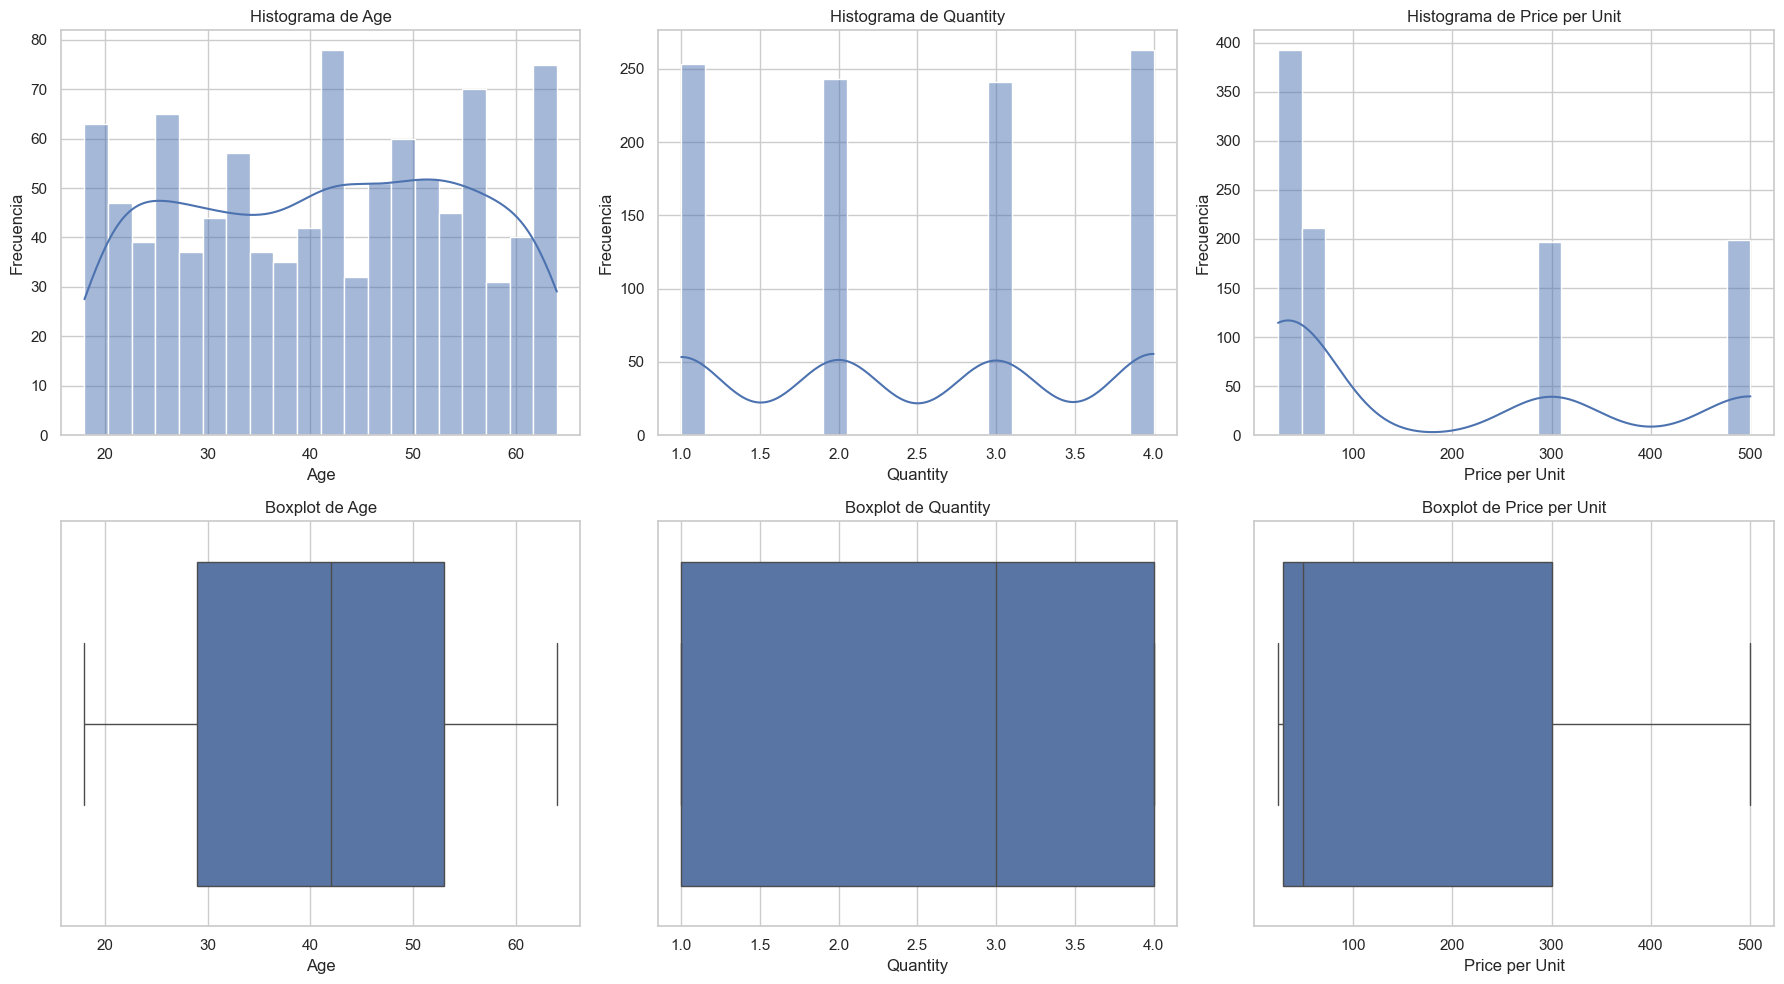

In [17]:

sns.set(style='whitegrid')

# Crear una figura con subgráficas
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Lista de columnas numéricas
num_cols = ['Age', 'Quantity', 'Price per Unit', 'Total Amount']

# Histogramas
for ax, col in zip(axes[0], num_cols):
    sns.histplot(df[col], bins=20, kde=True, ax=ax)
    ax.set_title(f'Histograma de {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frecuencia')

# Boxplots
for ax, col in zip(axes[1], num_cols):
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(f'Boxplot de {col}')
    ax.set_xlabel(col)

# Ajustar el layout
plt.tight_layout()
plt.show()


##### **Crea gráficos de líneas para mostrar las tendencias de ventas a lo largo del tiempo.**

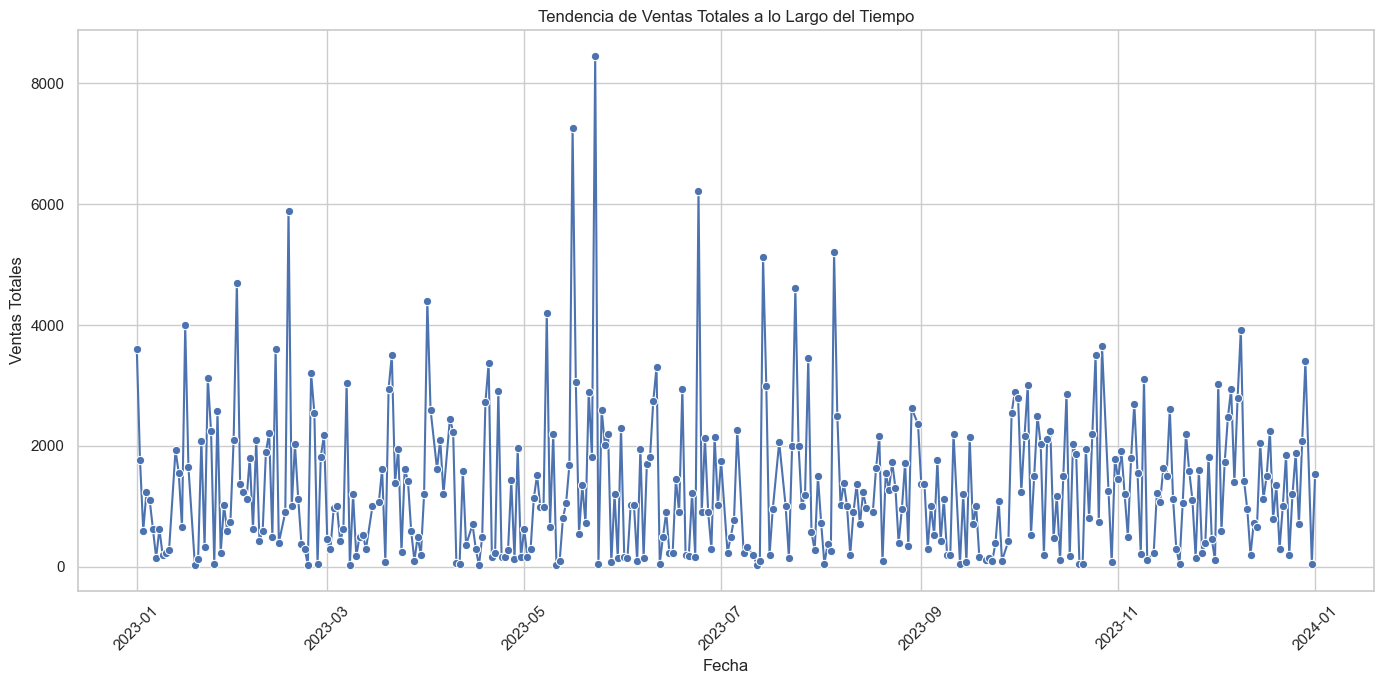

In [18]:
# Agrupar por fecha y calcular la suma de las ventas
ventas_diarias = df.groupby('Date')['Total Amount'].sum().reset_index()

sns.set(style='whitegrid')

# Crear el gráfico de líneas para ver la tendencia entre el total de ventas a lo largo del timpo
plt.figure(figsize=(14, 7))
sns.lineplot(data=ventas_diarias, x='Date', y='Total Amount', marker='o')

plt.title('Tendencia de Ventas Totales a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# El pico mas algo siendo mediados de Mayo-Junio del 2023

##### **Utiliza gráficos de dispersión para analizar la relación entre diferentes variables**

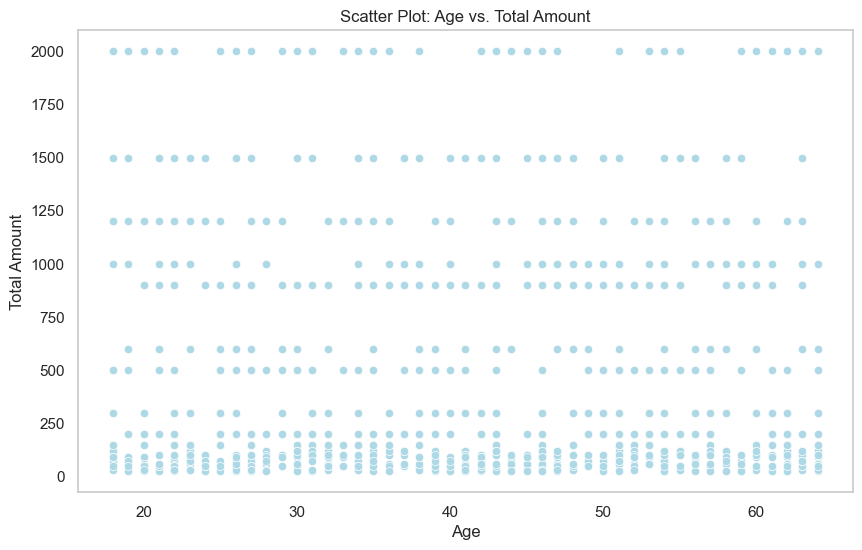

In [19]:
# Creamos un grafico de dispersion de las variables Age y Total Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Total Amount', color='lightblue')
plt.title('Scatter Plot: Age vs. Total Amount')
plt.xlabel('Age')
plt.ylabel('Total Amount')
plt.grid()
plt.show()

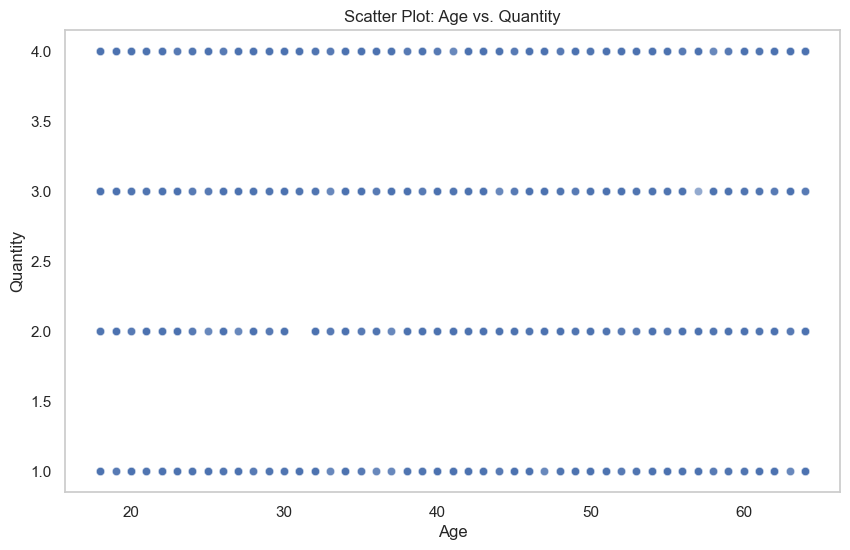

In [20]:
# Creamos un grafico de dispersion de las variables Age y Quantity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Quantity', alpha=0.6)
plt.title('Scatter Plot: Age vs. Quantity')
plt.xlabel('Age')
plt.ylabel('Quantity')
plt.grid()
plt.show()

##### **Combina histogramas y boxplots para visualizar la distribución de las ventas y detectar valores atípicos.**

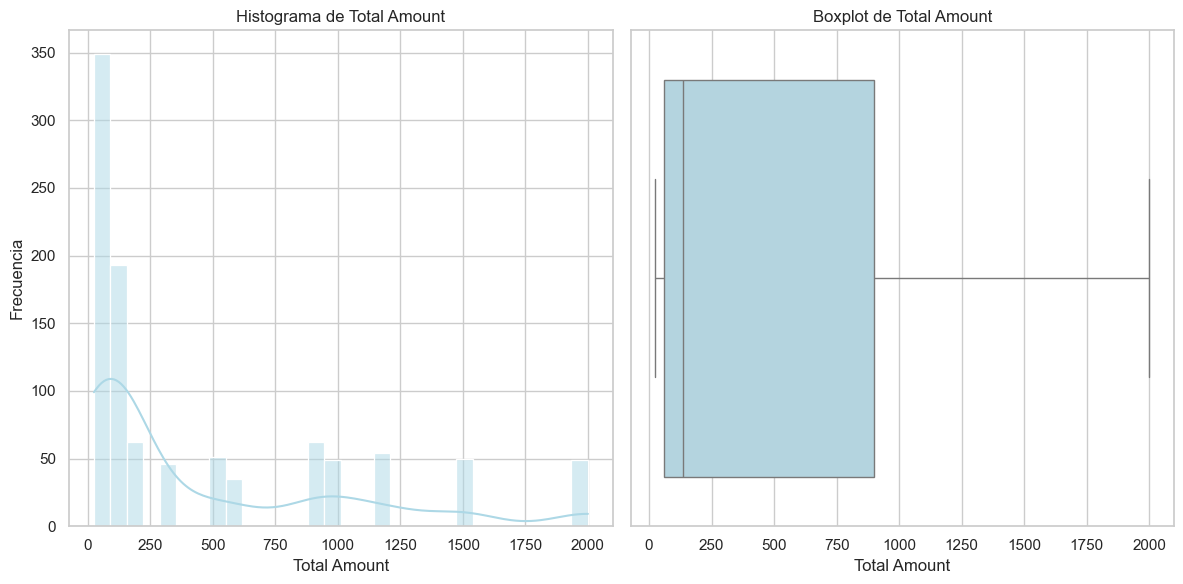

In [21]:
# Crear una figura con dos subgráficas
plt.figure(figsize=(12, 6))

# Histograma
plt.subplot(1, 2, 1)  
sns.histplot(df['Total Amount'], bins=30, kde=True, color='lightblue')
plt.title('Histograma de Total Amount')
plt.xlabel('Total Amount')
plt.ylabel('Frecuencia')

# Boxplot
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo subplot
sns.boxplot(data=df, x='Total Amount', color='lightblue')
plt.title('Boxplot de Total Amount')
plt.xlabel('Total Amount')

# Ajustar el espacio entre subgráficas
plt.tight_layout()

# Mostrar la figura
plt.show()

#### **Generar un Pull Request en GitHub**

* Después de completar el análisis y las visualizaciones, sube los cambios a una nueva rama en tu repositorio de GitHub y genera un Pull Request (PR) para revisión.

## **Visualización para ciencia de datos / Proyecto 1-Parte V (Core)**

#### **Análisis y Predicción de Ventas en una Tienda de Retail**

### **Parte V: Exploración y Visualización de Datos Avanzada**

En esta quinta parte del proyecto, vamos a expandir nuestro análisis exploratorio de datos (EDA) y visualización utilizando técnicas avanzadas. Aplicaremos todo lo que hemos aprendido hasta ahora, incluyendo cuadrículas, leyendas, anotaciones, flechas, y subplots, para obtener una comprensión más profunda de nuestro conjunto de datos de ventas.

#### **Instrucciones**

**1. Continuar desde la Parte IV**

Asegúrate de tener el DataFrame df ya cargado y preparado desde la Parte IV.


**2. Exploración de Datos Avanzada**

* Realiza un análisis de correlación y crea un mapa de calor para visualizar las relaciones entre las variables.
* Crea subplots para comparar diferentes variables clave.
Añade cuadrículas, leyendas, anotaciones y flechas a tus gráficos para mejorar la claridad y la información

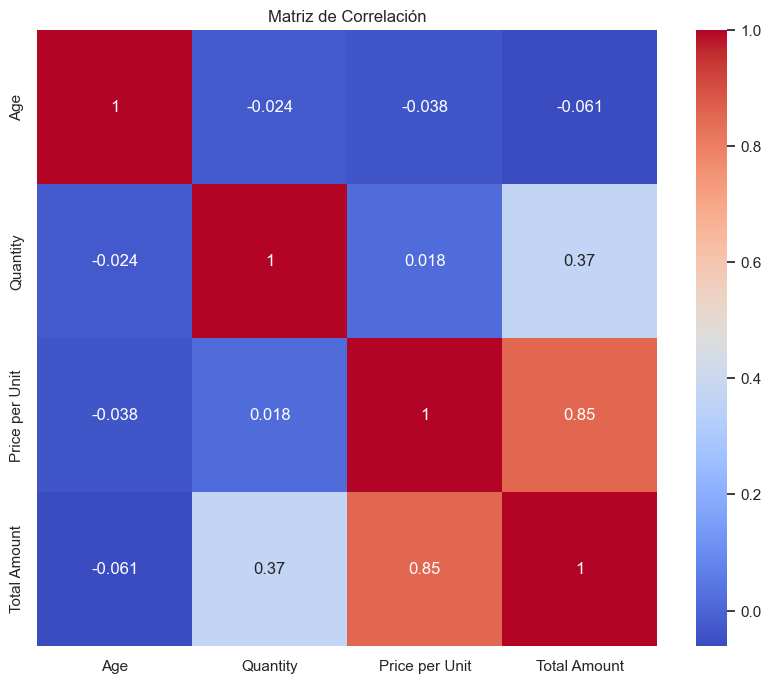

In [22]:
# Mapa de calor de las variables numericas
numeric_cols = ['Age', 'Quantity', 'Price per Unit', 'Total Amount']
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

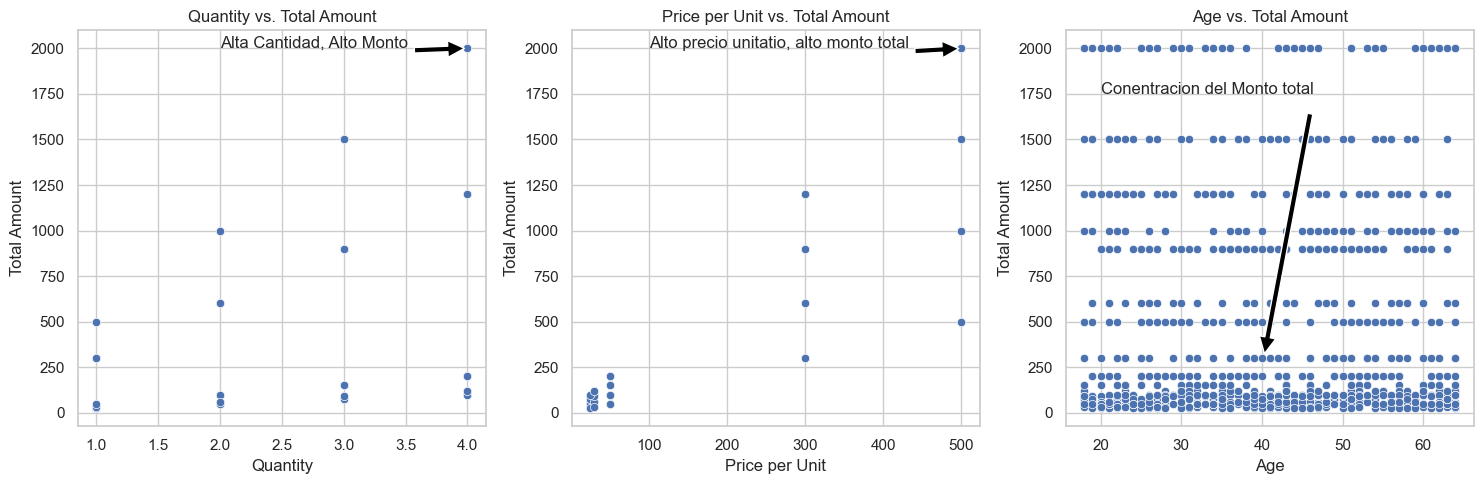

In [23]:
# Figura con 3 subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Subplot 1: Cantidad y Monto total
sns.scatterplot(x='Quantity', y='Total Amount', data=df, ax=axes[0])
axes[0].set_title('Quantity vs. Total Amount')
axes[0].grid(True)
axes[0].annotate('Alta Cantidad, Alto Monto', xy=(4.0, 2001), xytext=(2, 2005),
                 arrowprops=dict(facecolor='black', shrink=0.05))

# Subplot 2: Precio por unidad vs. Monto total
sns.scatterplot(x='Price per Unit', y='Total Amount', data=df, ax=axes[1])
axes[1].set_title('Price per Unit vs. Total Amount')
axes[1].grid(True)
# Add an annotation with specific coordinates
axes[1].annotate('Alto precio unitatio, alto monto total', xy=(500, 2000), xytext=(100, 2000),
                 arrowprops=dict(facecolor='black', shrink=0.05))


# Subplot 3: Age vs. Total Amount
sns.scatterplot(x='Age', y='Total Amount', data=df, ax=axes[2])
axes[2].set_title('Age vs. Total Amount')
axes[2].grid(True)
axes[2].annotate('Conentracion del Monto total', xy=(40, 250), xytext=(20, 1750),
                 arrowprops=dict(facecolor='black', shrink=0.05))

plt.tight_layout()
plt.show()